In [83]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [84]:
df = pd.read_csv('data.csv')
df1 = df.to_numpy()
X = df1[:,:-1]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
Y = df1[:,-1:].reshape(X.shape[0],)

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [86]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X_train,Y_train)
X_train, Y_train = X_smote, Y_smote

In [87]:
clf = MLPClassifier(random_state=1, activation="logistic", max_iter=3000, solver = 'adam', alpha = 0.001, learning_rate_init=0.001).fit(X_train, Y_train)

In [88]:
clf.predict_proba(X_test[:1])

array([[0.62066512, 0.37933488]])

In [89]:
a= clf.predict(X_test)

In [90]:
clf.score(X_test, Y_test)

0.7861896838602329

In [91]:
def plot_acc(acc_train, acc_test, lamb):
    plt.xlabel('log of lambda')
    plt.ylabel('accuracy')
    plt.title("Accuracy vs log of lambda.")
    plt.grid()
    plt.scatter(np.log10(lamb),acc_train,color='green', label = "training")
    plt.scatter(np.log10(lamb),acc_test,color='blue', label = "testing")
    plt.legend(['Training Accuracy', 'Test Accuracy'], )
    plt.show(block=False)

In [92]:
def neural_network_logistic(X_train, Y_train, X_test, Y_test, alpha, learning_rate_init):
    clf = MLPClassifier(hidden_layer_sizes=(8,),random_state=1, activation="logistic", max_iter=3000, solver = 'sgd', alpha = alpha, learning_rate_init=learning_rate_init).fit(X_train, Y_train)

    Yhat_train =  clf.predict(X_train)
    acc_train =  clf.score(X_train, Y_train)
    acc_train_logistic.append(acc_train)
    
    Yhat_test = clf.predict(X_test)
    acc_test = clf.score(X_test, Y_test)
    acc_test_logistic.append(acc_test)
    weight_logistic.append(clf.coefs_)

In [93]:
lamb = [0.001,0.01,0.1,1,10,100]
learning_rate = [0.001,0.01,0.1,1,10,100]

In [94]:
acc_train_logistic = []
acc_test_logistic = []
weight_logistic = []
for l in lamb:
    for rate in learning_rate:
        neural_network_logistic(X_train, Y_train, X_test, Y_test, l, rate)

C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:265: RuntimeWarning: overflow encountered in double_scalars
  loss += (0.5 * self.alpha) * values / n_samples
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:160: RuntimeWarning: overflow encountered in multiply
  coef_grads[layer] += (self.alpha * self.coefs_[layer])
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_base.py:109: RuntimeWarning: invalid value encountered in multiply
  delta *= (1 - Z)
C:\Users\sicon\AppData\L

In [95]:
max(acc_test_logistic)

0.8594009983361065

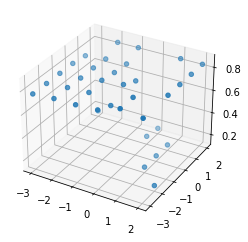

In [96]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter([-3,-2,-1,0,1,2]*6,[-3]*6+[-2]*6+[-1]*6+[0]*6+[1]*6+[2]*6,acc_test_logistic)

In [97]:
def neural_network_tanh(X_train, Y_train, X_test, Y_test, alpha, learning_rate_init):
    clf = MLPClassifier(hidden_layer_sizes=(8,),random_state=1, activation="tanh", max_iter=3000, solver = 'sgd', alpha = alpha, learning_rate_init=learning_rate_init).fit(X_train, Y_train)

    Yhat_train =  clf.predict(X_train)
    acc_train =  clf.score(X_train, Y_train)
    acc_train_tanh.append(acc_train)
    
    Yhat_test = clf.predict(X_test)
    acc_test = clf.score(X_test, Y_test)
    acc_test_tanh.append(acc_test)
    weight_tanh.append(clf.coefs_)

In [98]:
acc_train_tanh = []
acc_test_tanh = []
weight_tanh = []
for l in lamb:
    for rate in learning_rate:
        neural_network_tanh(X_train, Y_train, X_test, Y_test, l, rate)

C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:264: RuntimeWarning: overflow encountered in double_scalars
  values += np.dot(s, s)
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:160: RuntimeWarning: overflow encountered in multiply
  coef_grads[layer] += (self.alpha * self.coefs_[layer])
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't c

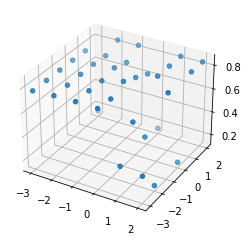

In [99]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter([-3,-2,-1,0,1,2]*6,[-3]*6+[-2]*6+[-1]*6+[0]*6+[1]*6+[2]*6,acc_test_tanh)

In [100]:
max(acc_test_tanh)

0.839018302828619